In [1]:
using DynamicalSystems
using DifferentialEquations
using OrdinaryDiffEq
using StaticArrays
using Statistics
using JLD
using CairoMakie
CairoMakie.activate!()

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [3]:
function CALCPDF(spikes)
    ϵ = 0.9
    ee_counter = [sum(i->s<=i<s+ϵ, spikes) for s in range(0,4,5000000)]
    pdf = ee_counter ./ length(spikes)
    return range(0,4,5000000), pdf
end

CALCPDF (generic function with 1 method)

In [4]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0
k1= -0.17; k2 = -0.17
k = 0.0
tspan = (0.0, 100000.0)

(0.0, 100000.0)

In [5]:
k_space = range(0.050,  0.056, length = 1000)
pvalues = range(-0.5, stop = 0.5, length = 500)
length(k_space)

1000

In [7]:
cd("C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\LSE for orbit diagram")
directory = pwd()
filename = "\\spectrum_orbitdiagram_zoom.jld"
path_to_LSE = directory*filename
spectrum_array = load(path_to_LSE)["data"];

In [6]:
cd("C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\attractors\\result\\files")
directory = pwd()
filename = "\\orbit_dia_k1=k2_zoom.jld"
path_to_dia = directory*filename
orbit_dia_data = load(path_to_dia)["data"];

In [8]:
directory_save = "C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\attractors\\result\\images"
filename_save = "\\2x2_LSE_orbit_zoom.eps"
path_save = directory_save*filename_save

"C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\attractors\\result\\images\\2x2_LSE_orbit_zoom.eps"

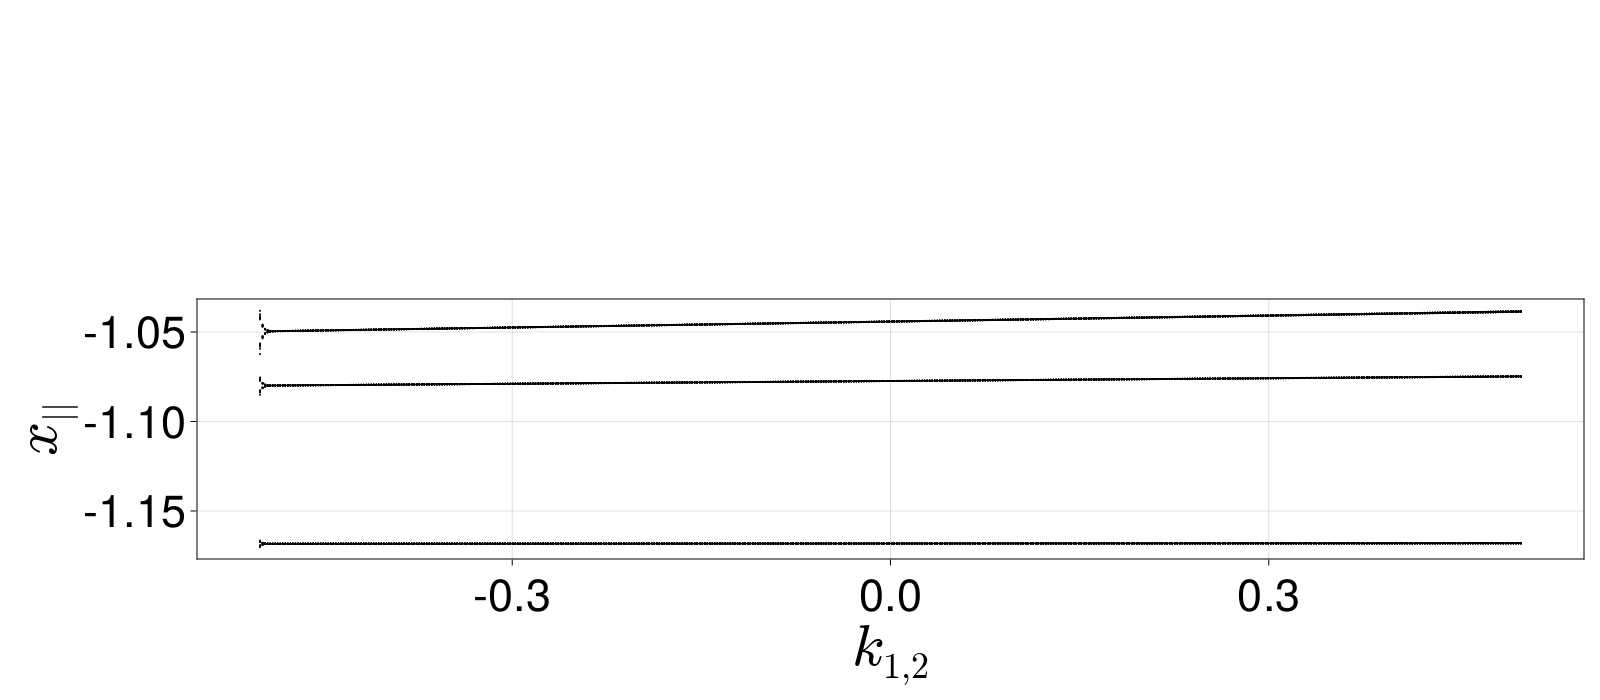

In [16]:
ticks_LSE = range(0.050,  0.056, length = 6)
yticks_LSE = range(-0.04, 0.02, length = 4)

ticks_orbit = range(0.050,  0.056, length = 6)
#yticks_orbit = [-2, -1, 0, 1, 2]

f = Figure(resolution = (1600, 700), fontsize = 20)

ax1 = Axis(f[1, 1], xlabel = L"k_{1, 2}", ylabel = L"\lambda_{1, 2, 3}",
                    xlabelsize = 60, ylabelsize = 60,
                    xticklabelsize = 45, yticklabelsize = 45, xticks = ticks_LSE, yticks = yticks_LSE  )
ax2 = Axis(f[2, 1], xlabel = L"k_{1,2}", ylabel = L"x_{||}",
                    xlabelsize = 60, ylabelsize = 60,
                    xticklabelsize = 45, yticklabelsize = 45, xticks = ticks_orbit, yticks = yticks_orbit  )

lines!(ax1, k_space, spectrum_array[1, :], linewidth = 3.0, color = "red")
lines!(ax1, k_space, spectrum_array[2, :], linewidth = 3.0, color = "green")
lines!(ax1, k_space, spectrum_array[3, :], linewidth = 3.0, color = "blue")

for (j, p) in enumerate(pvalues)
    scatter!(ax2, fill(p, length(orbit_dia_data[j])), orbit_dia_data[j];
        color = ("black", 1.0), markersize = 2.0
    )
    
end
#save(path_save, f)
f